In [2]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_excel('/content/dataset.xlsx')

In [ ]:
df.shape

(6982, 2)

In [ ]:
df.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [ ]:
df.tail()

,text,label
6977,I can't forget you #SpiritHadrian,0.0
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,0.0
6979,Dai5y! <3,0.0
6980,tired of clowns but still hopefully tonight if...,0.0
6981,MW SUBI WN LA VACA,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6972 non-null   object 
 1   label   6980 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.2+ KB


In [ ]:
df.isnull().sum()

,0
text,10
label,2


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(6970, 2)

shuffling the dataset

In [ ]:
df = df.sample(frac = 1)

<Axes: ylabel='count'>

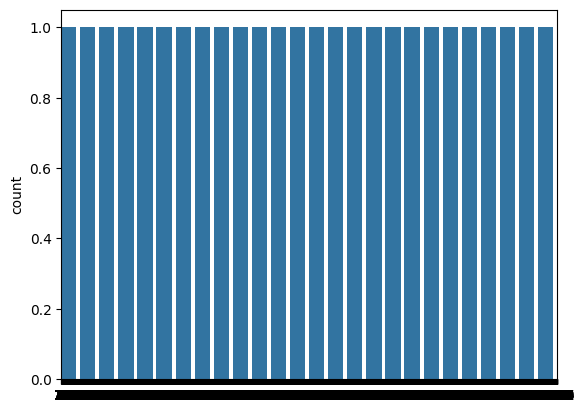

In [ ]:
sns.countplot(df.label)

Preprocessing Text

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Remove spacy import if not using it
import string
from bs4 import BeautifulSoup

# Download required NLTK data
nltk.download('wordnet')
nltk.download('stopwords')  # Add this if needed
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def text_transformation(text):
    text = str(text).lower()  
    text = re.sub(r'\[.*?\]', '', text)  
    text = re.sub(r"\W", " ", text)  
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  
    text = re.sub(r'<.*?>+', '', text)  
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)  
    text = re.sub(r'\w*\d\w*', '', text)  
    return text

In [ ]:
def text_cleaner(text):
    newString = str(text).lower()  # Convert to string first
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub(r'"', '', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b", "", newString)
    newString = re.sub(r"[^a-zA-Z]", " ", newString)
    newString = re.sub(r'[m]{2,}', 'mm', newString)
    # Remove extra whitespace
    newString = ' '.join(newString.split())
    return newString

Contraction Mapping

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
df['cleaned'] = df["text"].apply(text_cleaner)

Visualizing WordCloud

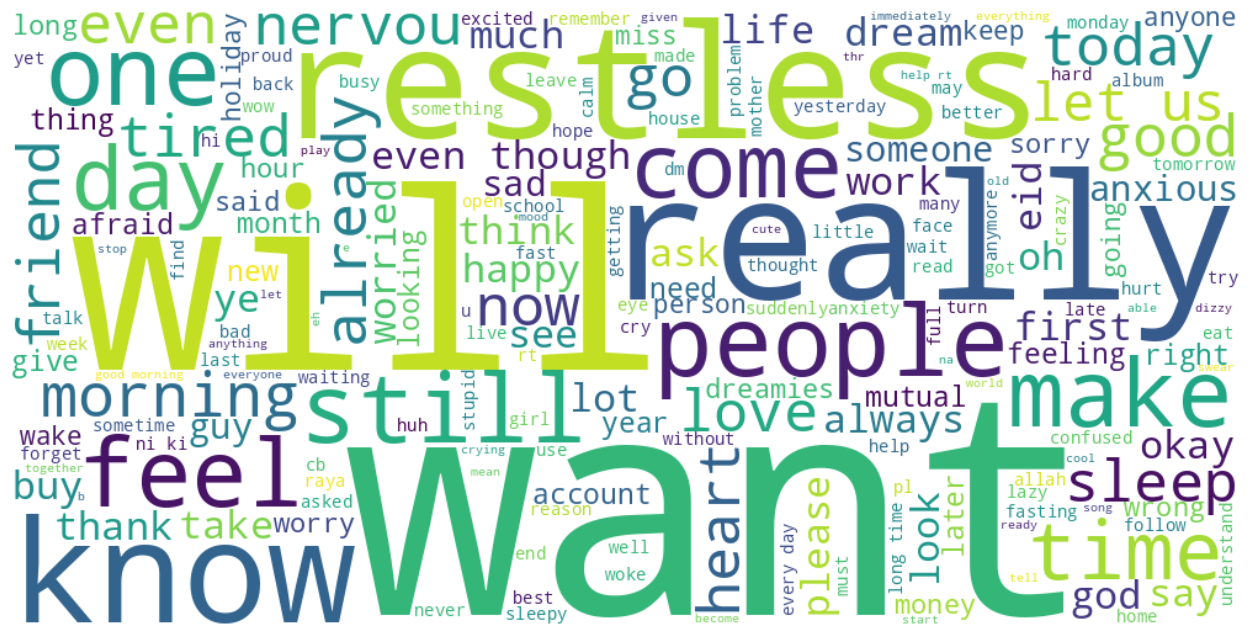

In [ ]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)  # Use tuple notation

word_cloud = ""
for row in df['cleaned']:
    word_cloud += " " + str(row)  # Simpler concatenation

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    min_font_size=6
).generate(word_cloud)

plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.tail()

,text,label,cleaned
6685,Thank you because your presence makes my life ...,0.0,thank you because your presence makes my life ...
148,"Later when you are tired of the new one, and t...",1.0,later when you are tired of the new one and th...
6265,want to cry,0.0,want to cry
611,"insecure, afraid, anxious, doubtful, disappoin...",1.0,insecure afraid anxious doubtful disappointed
2181,Yakari Yakari,0.0,yakari yakari


Feature Extraction with CountVectorizer

In [ ]:
X = df.cleaned
y = df.label

In [ ]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [ ]:
X_cv =vect.fit_transform(X).toarray()

In [ ]:
X_cv.shape

(6970, 20000)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

Model Performance Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
def performance_eval(clf, X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test, y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test, y_pred))
    print('   ------------ Confusion Matrix -------------- ')

    plt.figure(figsize=(10, 6))  # Create new figure
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Logistic Regression

Accuracy : 0.9799139167862266

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1248
         1.0       0.94      0.86      0.90       146

    accuracy                           0.98      1394
   macro avg       0.96      0.93      0.94      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


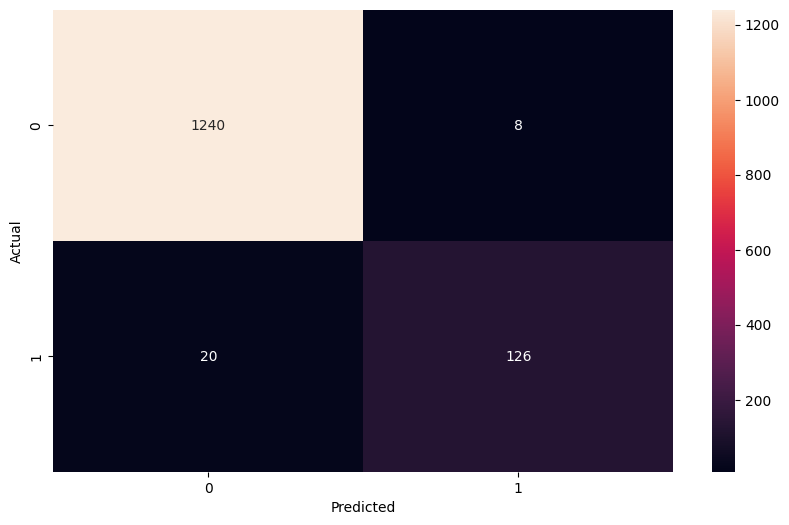

In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

Naive Bayes

Accuracy : 0.9404591104734576

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1248
         1.0       0.67      0.86      0.75       146

    accuracy                           0.94      1394
   macro avg       0.83      0.90      0.86      1394
weighted avg       0.95      0.94      0.94      1394

   ------------ Confusion Matrix -------------- 


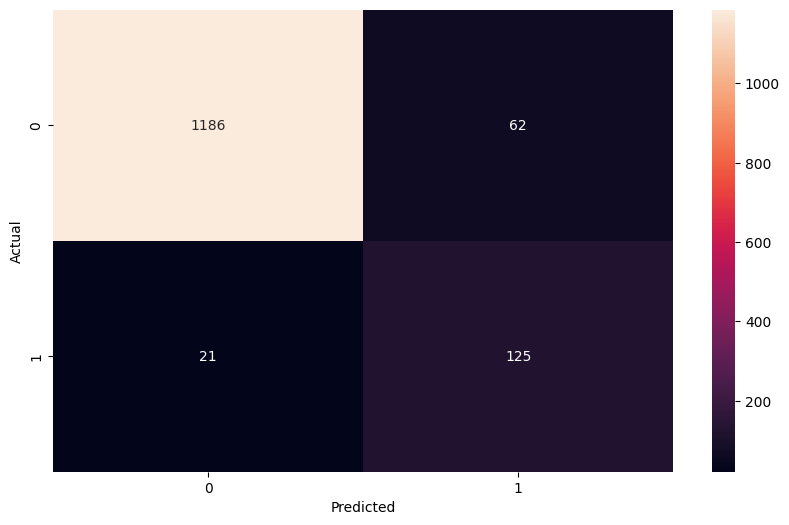

In [ ]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
performance_eval(clf_nb,X_test)

Decision Tree

Accuracy : 0.9827833572453372

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1248
         1.0       0.90      0.95      0.92       146

    accuracy                           0.98      1394
   macro avg       0.94      0.97      0.96      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


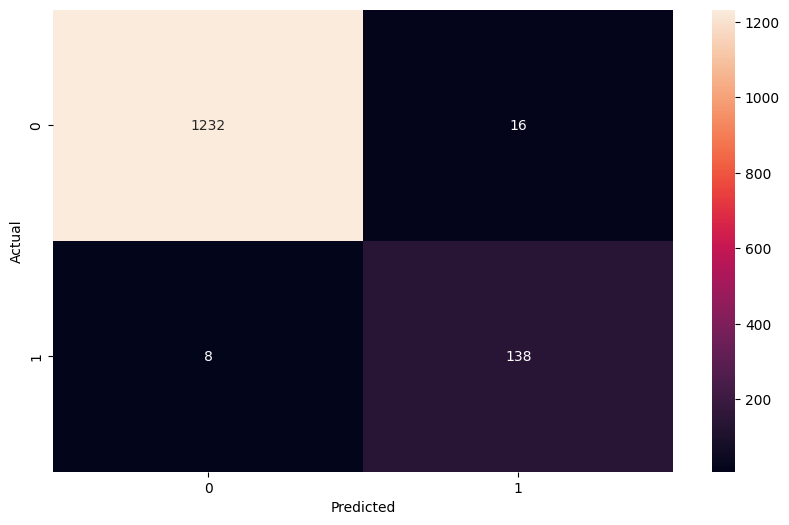

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

SVM

Accuracy : 0.9576757532281205

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1248
         1.0       0.96      0.62      0.76       146

    accuracy                           0.96      1394
   macro avg       0.96      0.81      0.87      1394
weighted avg       0.96      0.96      0.95      1394

   ------------ Confusion Matrix -------------- 


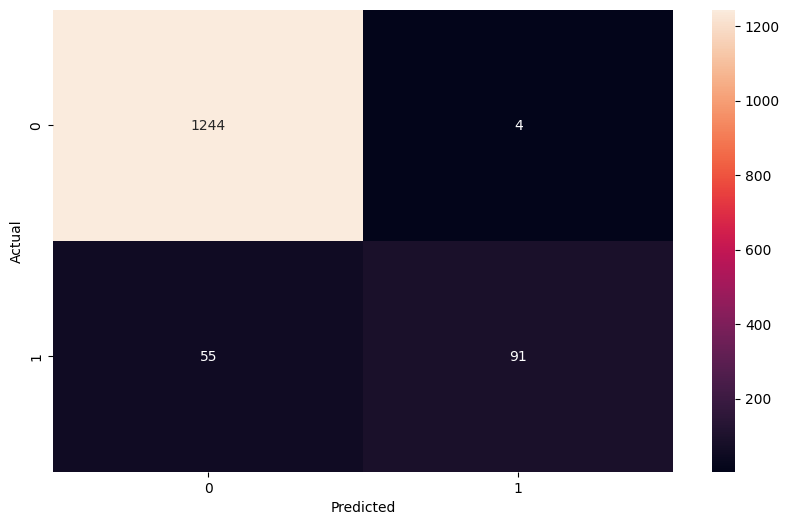

In [ ]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
performance_eval(clf_svm,X_test)

KNeighborsClassifier

Accuracy : 0.9153515064562411

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1248
         1.0       0.94      0.21      0.34       146

    accuracy                           0.92      1394
   macro avg       0.93      0.60      0.65      1394
weighted avg       0.92      0.92      0.89      1394

   ------------ Confusion Matrix -------------- 


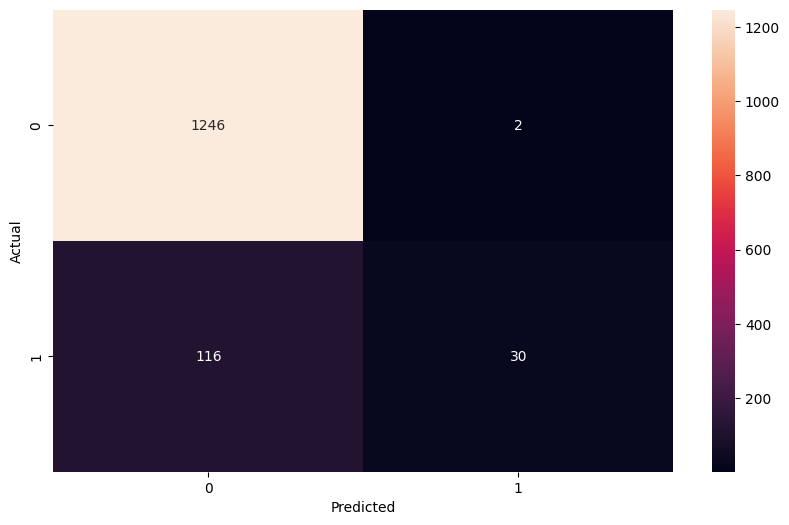

In [ ]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
performance_eval(clf_knn,X_test)

Adaboost Classifier

Accuracy : 0.9318507890961263

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1248
         1.0       1.00      0.35      0.52       146

    accuracy                           0.93      1394
   macro avg       0.96      0.67      0.74      1394
weighted avg       0.94      0.93      0.92      1394

   ------------ Confusion Matrix -------------- 


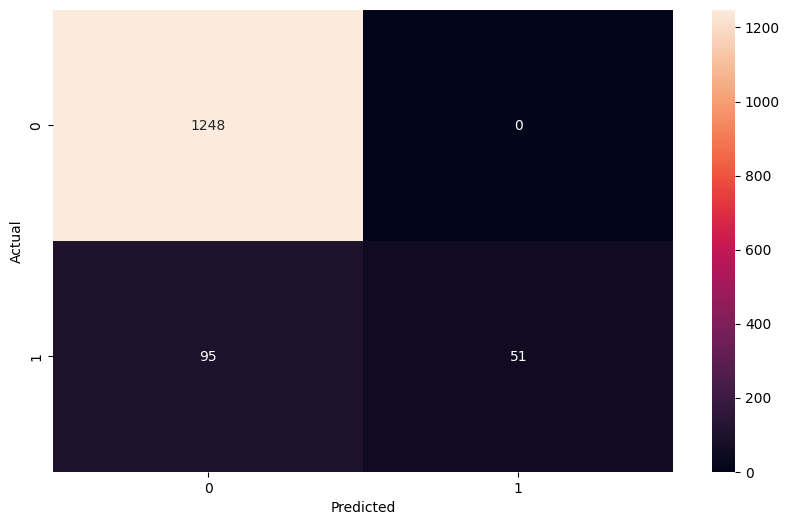

In [ ]:
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
performance_eval(clf_adb,X_test)

Random Forest

Accuracy : 0.9799139167862266

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1248
         1.0       0.94      0.86      0.90       146

    accuracy                           0.98      1394
   macro avg       0.96      0.93      0.94      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


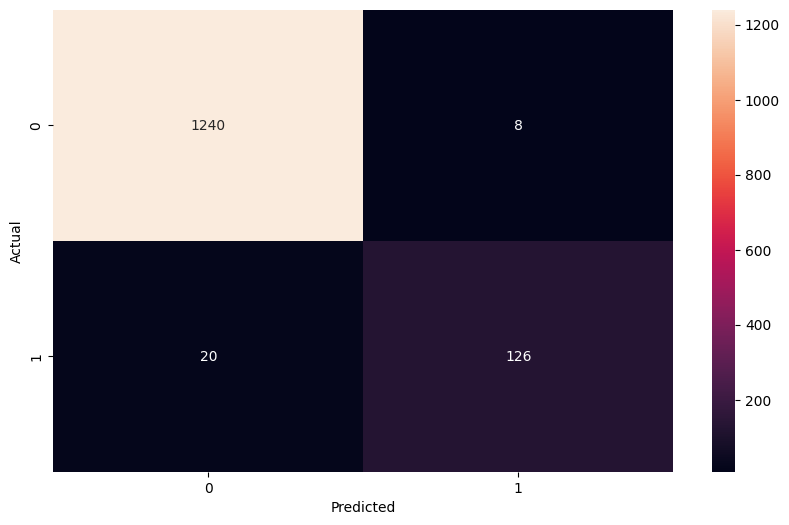

In [ ]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

Ensemble

Accuracy : 0.9727403156384505

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1248
         1.0       0.95      0.78      0.86       146

    accuracy                           0.97      1394
   macro avg       0.96      0.89      0.92      1394
weighted avg       0.97      0.97      0.97      1394

   ------------ Confusion Matrix -------------- 


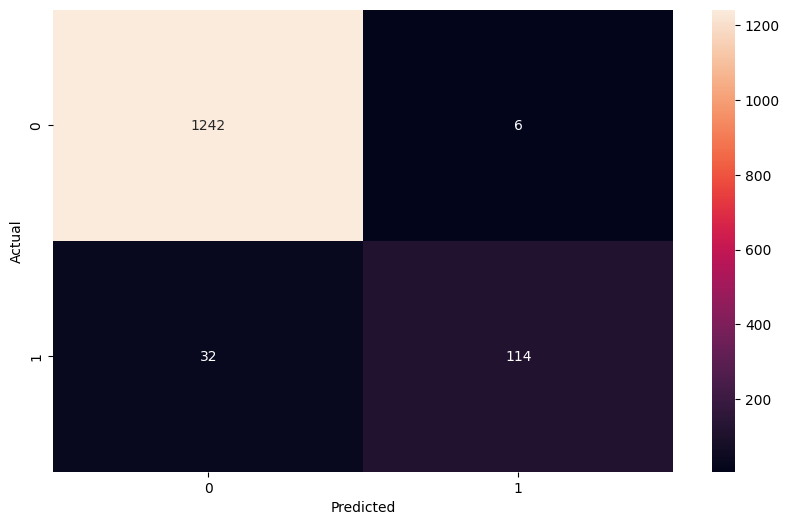

In [ ]:
voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('AdaBoost',clf_adb),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

Saving the Best Model

In [ ]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

In [ ]:
import pickle
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))

text = "I am happy"

clean_text = text_cleaner(text)
print(f"Cleaned text: {clean_text}")

single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

output = {
    0: "No Anxiety/Depression",
    1: "Anxiety/Depression"
}
print(f"Prediction: {output[single_prediction]}")

d:\Desktop\Student-Anxiety-and-Depression-Prediction-main\myvenv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Desktop\Student-Anxiety-and-Depression-Prediction-main\myvenv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Desktop\Student-Anxiety-and-Depression-Prediction-main\myvenv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Try